# Données de marketing bancaire

Objectif :
    
Étudier les données pour en sortir des analyses sur la campagne marketing menée par la banque 

Problématiques : 
    
D’après l’historique de données, quelles sont les bonnes pratiques à adopter pour réussir sa campagne marketing ? 

Comment la banque pourrait-elle augmenter le taux de souscription de ce produit ?


In [1]:
import pandas as pd
import matplotlib.pyplot
import numpy as np
import scipy.stats

%matplotlib inline

In [2]:
test = pd.read_csv("bank-full.csv")

Visualisation du jeu de données 

In [3]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
encode = df.groupby('education')['y'].mean()
print(encode)
df.loc[:,'education_mean_encode'] = df['education'].map(encode)
df

NameError: name 'df' is not defined

On repére les valeurs manquantes du dataset et on verra par la suite quelles solutions mettre en oeuvre pour contourner ce problème.

In [ ]:
test.isna().sum()

# Informations sur l'ensemble de données:

Les données sont liées aux campagnes de marketing direct d'une institution bancaire portugaise. Les campagnes de marketing étaient basées sur des appels téléphoniques. Souvent, plus d'un contact avec le même client était nécessaire pour savoir si le produit (dépôt à terme bancaire) serait ('oui') ou non ('non') souscrit.

L'objectif de classification est de prédire si le client souscrira (oui / non) un dépôt à terme (variable y).

In [6]:
test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [56]:
test["job"].describe()

count           45211
unique             12
top       blue-collar
freq             9732
Name: job, dtype: object

In [57]:
test["age"].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [58]:
test["marital"].describe()

count       45211
unique          3
top       married
freq        27214
Name: marital, dtype: object

In [59]:
test["balance"].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

défaut: le crédit est-il en défaut? 

In [60]:
test["default"].describe()

count     45211
unique        2
top          no
freq      44396
Name: default, dtype: object

In [61]:
test["campaign"].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [62]:
test["housing"].describe()

count     45211
unique        2
top         yes
freq      25130
Name: housing, dtype: object

In [63]:
test.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
test.describe().round(2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


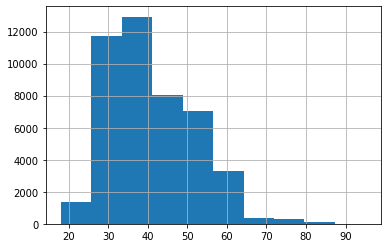

In [65]:
test["age"].hist()

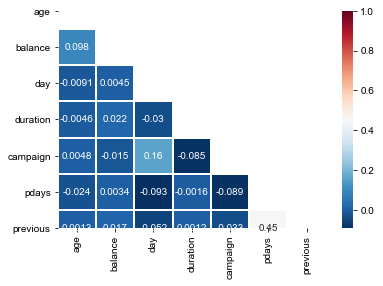

In [9]:
import seaborn as sns
mask = np.zeros(test.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
sns.heatmap(test.corr(), 
            xticklabels=test.corr().columns,
            yticklabels=test.corr().columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.9,mask=mask)
sns.set(rc={'figure.figsize':(19,9)})

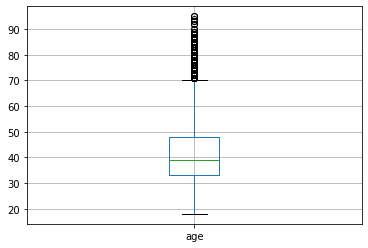

In [66]:
test.boxplot("age")

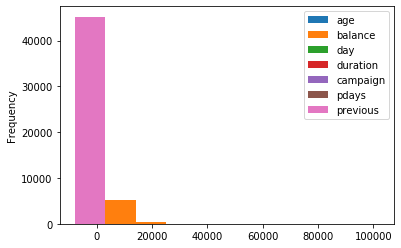

In [67]:
test.plot.hist()

C:\Users\utilisateur\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


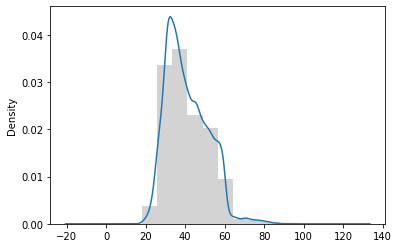

In [68]:
test.age.plot(kind = "hist", normed = True, color = "lightgrey")
test.age.plot(kind = "kde")

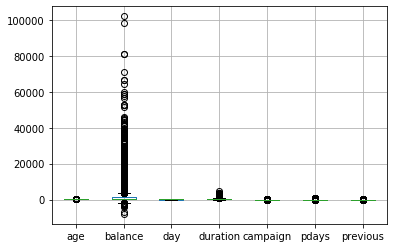

In [69]:
test.boxplot()

# Statistiques descriptives bivariées

In [70]:
test.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [4]:
test.age.cov(test.balance)

NameError: name 'test' is not defined

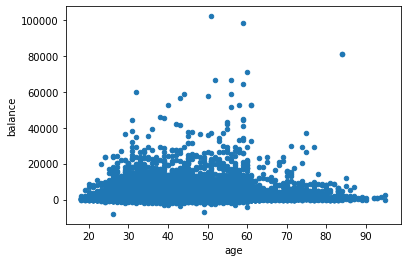

In [72]:
test.plot.scatter("age", "balance")

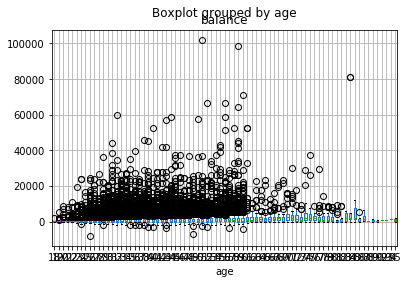

In [76]:
test.boxplot(column = "balance", by = "age")

NameError: name 'plt' is not defined

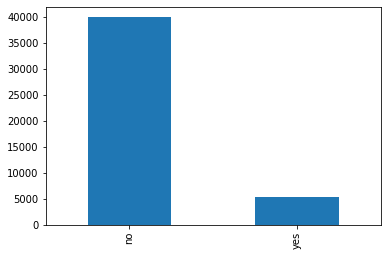

In [78]:
test['y'].value_counts().plot.bar()
plt.ylabel('Count')
plt.show()

In [79]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
for i, col in enumerate(categorical_cols):
    row_index = (i % 3)
    col_index = int(i / 3)
    fig.add_subplot(df[col].value_counts().plot.bar(ax=axes[row_index, col_index], title=col))

NameError: name 'plt' is not defined